In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_ = cv2.imread("right.jpeg")
img1 = cv2.cvtColor(img_, cv2.COLOR_BGR2GRAY)

img = cv2.imread("left.jpeg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [4]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

In [5]:
good = []
for m in matches:
    if m[0].distance < 0.5*m[1].distance:
        good.append(m)
matches = np.asarray(good)

In [9]:
if len(matches[:, 0]) >= 4:
    src = np.float32([ kp1[m.queryIdx].pt for m in matches[:, 0] ]).reshape(-1,1,2)
    dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:, 0] ]).reshape(-1,1,2)
    
    H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)
else:
    raise AssertError("Can’t find enough keypoints.")


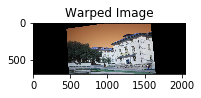

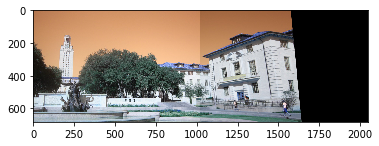

In [12]:
dst = cv2.warpPerspective(img_, H, (img.shape[1] + img_.shape[1], img.shape[0]))

plt.subplot(122),plt.imshow(dst),plt.title('Warped Image')
plt.show()
plt.figure()

dst[0:img.shape[0], 0:img.shape[1]] = img
plt.imshow(dst)
plt.show()